In [28]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10).fit(X)
kmeans
kmeans.labels_

array([1, 1, 1, 0, 0, 0], dtype=int32)

In [3]:
kmeans.predict([[0, 0], [12, 3]])
kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

# Import single motion data

In [4]:
data_dir = "ECE5242Proj2-train/"
data = np.array([])

print("Loading training data...")
for filename in os.listdir(data_dir):
    if filename.endswith(".txt"):
        if "wave" not in filename:
            continue
        temp = np.loadtxt(data_dir + filename)
        print(temp.shape)
        if len(data) == 0:
            data = temp[:,1:]
        else:
            data = np.concatenate((data, temp[:,1:]))
        print(data.shape)
        print(data)
        kmeans = KMeans(n_clusters=75).fit(data)
        kmeans
        kmeans.labels_
#         break

#         temp = np.loadtxt(data_dir2 + filename)
#         if len(data2) == 0:
#             data2 = temp
#         else:
#             data2 = np.concatenate((data2, temp))
#     i += 1
    # if i > 15:
    #     break

Loading training data...
(3225, 7)
(3225, 6)
[[ 9.277115 -0.085312  5.106064  0.358337  0.081268 -0.222961]
 [ 9.258072 -0.130539  5.182236  0.374359  0.098358 -0.212814]
 [ 9.24617  -0.085312  5.251266  0.388245  0.114914 -0.203735]
 ...
 [ 9.24617  -1.523056  5.317917  0.148987  0.128265 -0.033371]
 [ 9.231888 -1.494492  5.446457  0.137238  0.144287 -0.036041]
 [ 9.222366 -1.534958  5.396469  0.125488  0.162979 -0.046188]]
(2526, 7)
(5751, 6)
[[ 9.277115e+00 -8.531200e-02  5.106064e+00  3.583370e-01  8.126800e-02
  -2.229610e-01]
 [ 9.258072e+00 -1.305390e-01  5.182236e+00  3.743590e-01  9.835800e-02
  -2.128140e-01]
 [ 9.246170e+00 -8.531200e-02  5.251266e+00  3.882450e-01  1.149140e-01
  -2.037350e-01]
 ...
 [ 9.008133e+00 -1.646835e+00  5.486923e+00  1.313630e-01  1.611300e-02
  -5.066000e-03]
 [ 8.946243e+00 -1.680161e+00  5.386948e+00  9.291100e-02  1.237500e-02
  -7.202000e-03]
 [ 8.953384e+00 -1.732529e+00  5.267929e+00  7.315100e-02  1.184100e-02
  -9.872000e-03]]
(2266, 7)
(

In [5]:
# kmeans.predict([[0, 0], [12, 3]])
kmeans.cluster_centers_

array([[ 4.53275055e+00,  2.83113246e+00,  5.17977559e+00,
         2.72492560e+00,  2.74411538e+00, -3.99081711e+00],
       [-1.38961874e+00,  7.67822299e+00, -3.78647563e+00,
        -1.50779852e+00, -5.80506523e-01,  1.07057298e+00],
       [ 9.59984428e+00, -2.40194683e+00,  6.80180015e+00,
        -1.43790797e+00, -1.91291782e+00,  4.51718423e+00],
       [ 1.61025765e+01, -6.15297394e+00,  4.73585601e+00,
         1.76490793e-01,  1.67505136e-01, -1.24713559e+00],
       [ 7.44270475e+00,  1.73039530e+00,  5.41283858e+00,
        -2.59384105e+00, -3.21401712e+00,  4.79052684e+00],
       [-1.00563488e+00,  5.41454184e+00,  6.24542974e-01,
         3.68007407e+00,  1.60802321e+00, -1.32813007e+00],
       [ 9.26247713e+00,  1.74647044e-01,  4.79302958e+00,
         4.15701461e-02, -4.67919497e-02,  2.25039448e-02],
       [-2.56067079e+00,  6.11551028e+00, -8.02824548e+00,
        -5.68122794e-01,  2.67844766e-02,  3.74669019e-01],
       [ 1.81052159e+00,  5.74346248e+00,  2.419

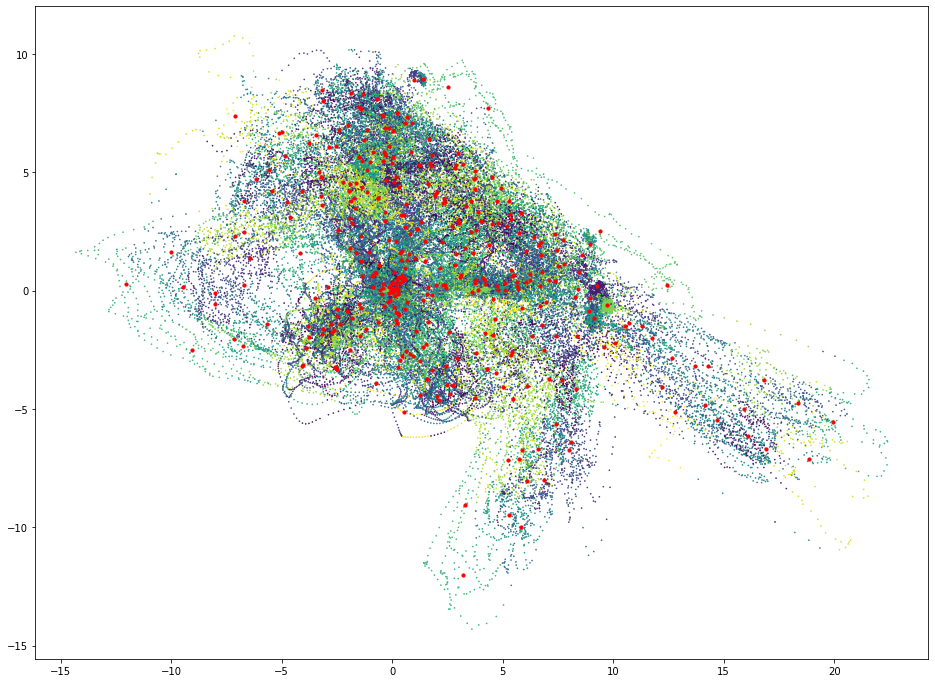

In [6]:
plt.figure(figsize=(16, 12))
for i in range(data.shape[1] - 1):
    plt.scatter(data[:,i], data[:,i+1], c=kmeans.labels_.astype(float), s=0.4)
for i in range(data.shape[1] - 1):
    plt.scatter(kmeans.cluster_centers_[:,i], kmeans.cluster_centers_[:,i+1], c='r', s=10)
# plt.scatter(data[:,0], data[:,1])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


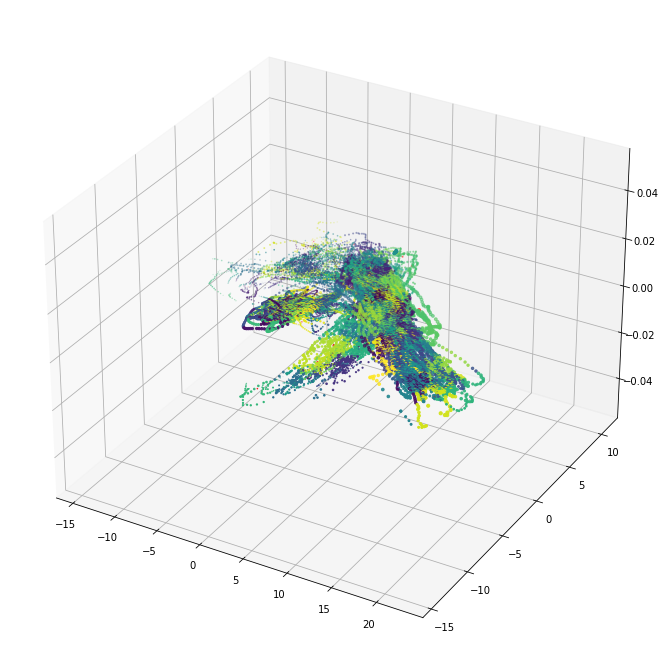

In [7]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(projection='3d')
for i in range(data.shape[1] - 2):
    plt.scatter(data[:,i], data[:,i+1], data[:,i+2], c=kmeans.labels_.astype(float))
for i in range(data.shape[1] - 2):
    plt.scatter(kmeans.cluster_centers_[:,i], kmeans.cluster_centers_[:,i+1], kmeans.cluster_centers_[:,i+2], c='r')
# plt.scatter(data[:,0], data[:,1])

In [8]:
A = np.zeros([3, 3])
A

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [373]:
def forward(O, A, B, pi):
    # alpha[t][i] where 1 < t < len(O), 1 < i < len(A)
    alpha = np.zeros([len(O), len(A)])
    alphaDots = np.zeros([len(O), len(A)])
    alphaHat = np.zeros([len(O), len(A)])
    c = np.zeros(len(O))
    # alpha[1][i] <- pi[i]
#     alpha[0] = pi * b[:, int(O[0])]
#     print(B)
#     print(pi)
    alpha[0, :] = pi * B[:, int(O[0])]
    alphaDots[0] = alpha[0]
    c[0] = 1 / np.sum(alphaDots[0])
    alphaHat[0] = c[0] * alphaDots[0]
#     print(A)
#     print(B)
    for t in range(1, len(O)):
        for i in range(len(A)):
#             No scaling
#             alpha[t, i] = alpha[t - 1].dot(A[i] * B[i, int(O[t])])
#             Scaling
            alphaDots[t, i] = (alphaHat[t - 1]).dot(A[i] * B[i, int(O[t])])
        c[t] = 1 / np.sum(alphaDots[t])
#         print(c[t], alphaDots[t])
        alphaHat[t] = c[t] * alphaDots[t]
    
    return alphaHat, c

In [426]:
def backward(O, A, B, c):
    beta = np.zeros([len(O), len(A)])
    betaHat = np.zeros([len(O), len(A)])
    beta[len(O) - 1] = np.ones(len(A))
    betaHat[-1] = c[-1] * beta[-1]
    for t in reversed(range(len(O) - 1)):
        for i in range(len(A)):
#             No scaling
#             beta[t][i] = A[:, i].dot(B[:, int(O[t + 1])] * beta[t + 1])
#             Scaling
            beta[t][i] = A[:, i].dot(B[:, int(O[t + 1])] * betaHat[t + 1])
        betaHat[t] = c[t] * beta[t]
    
    return betaHat

In [392]:
def EStep(O, A, B, alpha, beta, c):
    gamma = np.zeros([len(O), len(A)])
#     for t in range(len(O)):
#         alpha[t] /= c[t]
#         beta[t] /= c[t]
    for t in range(len(O)):
        denominator = alpha[t].dot(beta[t])
        for i in range(len(A)):
            numerator = alpha[t, i] * beta[t, i]
            gamma[t,i] = numerator / denominator
    
    zeta = np.zeros([len(O), len(A), len(A)])
    for t in range(len(O) - 1):
        denominator = 0
        for i in range(len(A)):
            for j in range(len(A)):
                denominator += alpha[t, i] * A[j, i] * B[j, int(O[t+1])] * beta[t+1, j]
        for i in range(len(A)):
            for j in range(len(A)):
#                 print(B.shape, j, O[t+1])
                numerator = alpha[t, i] * A[j, i] * B[j, int(O[t+1])] * beta[t + 1, j]
                zeta[t, i, j] = numerator / denominator
    
    return gamma, zeta
    

In [443]:
def MStep(O, A, B, gamma, zeta, c, alpha, beta):
    for i in range(len(A)):
        for j in range(len(A)):
            numerator = 0
            denominator = np.sum(zeta[:-1, i, :])
            for t in range(len(O) - 1):
                numerator += zeta[t, i, j]
            A[j, i] = numerator / denominator
#             numerator = 0
#             denominator = 0
#             for t in range(len(O) - 1):
#                 numerator += alpha[t, i] * A[j, i] * B[j, int(O[t + 1])] * beta[t + 1, j]
#                 denominator += alpha[t, i] * beta[t, i] / c[t]
#             A[j, i] = numerator / denominator
        
        for i in range(len(A)):
            # Working but buggy
            B[:, i] = np.sum(gamma[O.T[0] == i], axis = 0) / np.sum(gamma, axis= 0)

#             for o in range(len(B[0])):
#                 numerator = 0
#                 denominator = 0
#                 for t in range(len(O)):
#                     if O[t] == o:
# #                         numerator += gamma[t][i] / c[t]
#                         numerator += alpha[t, o] * beta[t, o] / c[t]
#                     denominator += alpha[t, o] * beta[t, o] / c[t]
# #                 B[i][o] = numerator / np.sum(gamma[:, i] / c[t])
#                 B[i][o] = numerator / denominator
    
    return A, B

In [450]:
def baum_welch(O, A, B, pi, lMax):
    for l in range(lMax):
        alpha, c = forward(O, A, B, pi)
        beta = backward(O, A, B, c)
        
        gamma, zeta = EStep(O, A, B, alpha.copy(), beta.copy(), c)
        A, B = MStep(O, A, B, gamma, zeta, c, alpha, beta)
#         for i in range(len(B)):
#             for j in range(len(B[0])):
#                 if B[i, j] == 0:
#                     B[i, j] = 1e-8
#         print(l)
#         print(alpha)
#         print(np.sum(alpha, axis = 1)[-1])
#         print(np.sum(alpha[-1]))
#         print(np.sum(gamma[0]), np.sum(gamma[1]))
#         break
#     print(c)
#     print(np.divide(beta, np.atleast_2d(c).T))
#     Check alphas
#     for t in range(len(O)):
#         print(alpha[t] / np.prod(c[:t+1]))
#     Check betas
#     for t in range(len(O)):
#         print(beta[t] / np.prod(c[t:]))
    
    return A, B

In [146]:
def forwardOld(V, a, b, initial_distribution):
    alpha = np.zeros((V.shape[0], a.shape[0]))
#     print(b)
#     print(initial_distribution)
    alpha[0, :] = initial_distribution * b[:, int(V[0])]
     
    for t in range(1, V.shape[0]):
        for j in range(a.shape[0]):
            # Matrix Computation Steps
            #                  ((1x2) . (1x2))      *     (1)
            #                        (1)            *     (1)
            alpha[t, j] = alpha[t - 1] @ a[:, j] * b[j, int(V[t])]
 
    return alpha

In [12]:
def backwardOld(V, a, b):
    beta = np.zeros((V.shape[0], a.shape[0]))
 
    # setting beta(T) = 1
    beta[V.shape[0] - 1] = np.ones((a.shape[0]))
 
    # Loop in backward way from T-1 to
    # Due to python indexing the actual loop will be T-2 to 0
    for t in range(V.shape[0] - 2, -1, -1):
        for j in range(a.shape[0]):
            beta[t, j] = (beta[t + 1] * b[:, int(V[t + 1])]) @ a[j, :]
 
    return beta

In [451]:
def baum_welchOld(V, a, b, initial_distribution, n_iter=100):
    M = a.shape[0]
    T = len(V)

    for n in range(n_iter):
        ###estimation step
#         print(b)
        alpha = forwardOld(V, a, b, initial_distribution)
        beta = backwardOld(V, a, b)

        xi = np.zeros((M, M, T - 1))
        for t in range(T - 1):
            # joint probab of observed data up to time t @ transition prob * emisssion prob as t+1 @
            # joint probab of observed data from time t+1
            denominator = (alpha[t, :].T @ a * b[:, int(V[t + 1])].T) @ beta[t + 1, :]
            for i in range(M):
                numerator = alpha[t, i] * a[i, :] * b[:, int(V[t + 1])].T * beta[t + 1, :].T
                xi[i, :, t] = numerator / denominator

        gamma = np.sum(xi, axis=1)
        ### maximization step
        a = np.sum(xi, 2) / np.sum(gamma, axis=1).reshape((-1, 1))

        # Add additional T'th element in gamma
        gamma = np.hstack((gamma, np.sum(xi[:, :, T - 2], axis=0).reshape((-1, 1))))

        K = b.shape[1]
        denominator = np.sum(gamma, axis=1)
        for l in range(K):
            b[:, l] = np.sum(gamma[:, V[:, 0] == l], axis=1)

        b = np.divide(b, denominator.reshape((-1, 1)))
#         print(n)
#         print(alpha)
#         print(np.sum(alpha[-1]))
#         print(np.sum(gamma[0]), np.sum(gamma[1]))
#         break
#     print(beta)
    return a, b

In [449]:
X=np.concatenate((np.zeros((1000,1)),np.random.randint(0,2,size=(1000,1)),np.zeros((1000,1))))
# Y = np.array([[0, 1]*50]).T
# X=np.concatenate((np.zeros((100,1)),Y,np.zeros((100,1))))
# print(Y)
X.shape

(3000, 1)

In [452]:
A = np.ones([2, 2])
# A = np.array([[.25, .75], [0.5, 0.5]])
A = A / len(A)
# B = np.ones([2, 2])
# B = B / len(B[0])
B = np.array([[1, 0], [0.5, 0.5]])
# print(A)
# print(B)
pi = np.array([1, 0])
A, B = baum_welch(X.copy(), A.copy(), B.copy(), pi.copy(), 100)

A.T, B

(array([[9.99491913e-01, 5.08086948e-04],
        [1.01230311e-03, 9.98987697e-01]]),
 array([[1.        , 0.        ],
        [0.49794435, 0.50205565]]))

In [448]:
A = np.ones([2, 2])
# A = np.array([[.25, .75], [0.5, 0.5]])
A = A / len(A)
# B = np.ones([2, 2])
# B = B / len(B[0])
B = np.array([[1, 0], [0.5, 0.5]])
# print(A)
# print(B)
pi = np.array([1, 0])
A, B = baum_welchOld(X.copy(), A.copy(), B.copy(), pi.copy(), 100)

A, B

[[2.21957192e-35 4.49218909e-37]
 [2.23119538e-35 4.51571381e-37]
 [2.24287972e-35 4.53936172e-37]
 [2.25462524e-35 4.56313347e-37]
 [2.26643228e-35 4.58702972e-37]
 [2.27830114e-35 4.61105110e-37]
 [2.29023216e-35 4.63519828e-37]
 [2.30222566e-35 4.65947191e-37]
 [2.31428197e-35 4.68387265e-37]
 [2.32640141e-35 4.70840118e-37]
 [2.33858433e-35 4.73305816e-37]
 [2.35083104e-35 4.75784427e-37]
 [2.36314188e-35 4.78276017e-37]
 [2.37551720e-35 4.80780656e-37]
 [2.38795732e-35 4.83298410e-37]
 [2.40046258e-35 4.85829350e-37]
 [2.41303334e-35 4.88373544e-37]
 [2.42566993e-35 4.90931061e-37]
 [2.43837269e-35 4.93501971e-37]
 [2.45114197e-35 4.96086345e-37]
 [2.46397812e-35 4.98684253e-37]
 [2.47688150e-35 5.01295765e-37]
 [2.48985244e-35 5.03920953e-37]
 [2.50289132e-35 5.06559889e-37]
 [2.51599847e-35 5.09212645e-37]
 [2.52917426e-35 5.11879292e-37]
 [2.54241906e-35 5.14559905e-37]
 [2.55573321e-35 5.17254555e-37]
 [2.56911709e-35 5.19963316e-37]
 [2.58257106e-35 5.22686263e-37]
 [2.596095

(array([[0.99473725, 0.00526275],
        [0.01012143, 0.98987857]]),
 array([[1.        , 0.        ],
        [0.49975324, 0.50024676]]))

In [411]:
# compore to hmmlearn
from hmmlearn import hmm
A = np.ones([2, 2])
# A = np.array([[.25, .75], [0.5, 0.5]])
A = A / len(A)
# B = np.ones([2, 2])
# B = B / len(B[0])
B = np.array([[1, 0], [0.5, 0.5]])

pi = np.array([1, 0])
model = hmm.CategoricalHMM(n_components=2, n_iter=1, init_params="", params="te", tol=0)
model.startprob_ = pi
model.transmat_ = A
model.emissionprob_ = B

model.fit(X.astype(int))
print(f'hmmlearn A \n{model.transmat_}')
print(f'hmmlearn B \n{model.emissionprob_}')

hmmlearn A 
[[0.59691482 0.40308518]
 [0.49833333 0.50166667]]
hmmlearn B 
[[1.         0.        ]
 [0.61845387 0.38154613]]


In [136]:
print("test")

test
